# Проект исследования гипотез по увеличению выручки в интернет-магазине

**Цели проекта**  
- провести приоритизацию гипотез по фреймворкам ICE и RICE.  
- построить графики кумулятивной выручки, среднего чека, конверсии по групам
- изучить статистическую значимость между группами и провести А/В тесты


Описание данных    
* 		Hypothesis — краткое описание гипотезы;  
* 		Reach — охват пользователей по 10-балльной шкале;  
* 		Impact — влияние на пользователей по 10-балльной шкале;  
* 		Confidence — уверенность в гипотезе по 10-балльной шкале;  
* 		Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.   
* 		transactionId — идентификатор заказа;  
* 		visitorId — идентификатор пользователя, совершившего заказ;  
* 		date — дата, когда был совершён заказ;  
* 		revenue — выручка заказа;  
* 		group — группа A/B-теста, в которую попал заказ.  
* 		date — дата;   
* 		visitors — количество пользователей в указанную дату в указанной группе A/B-теста  

### Проект исследования

    
*Часть 1*
 - Приоритизация гипотез

*Часть 2*
 - График кумулятивной выручки по группам
 - График кумулятивного среднего чека по группам
 - График относительного изменения кумулятивного среднего чека группы B к группе A
 - График кумулятивной конверсии по группам
 - График относительного изменения кумулятивной конверсии группы B к группе A
 - Точечный график количества заказов по пользователям
 - 95-й и 99-й перцентили количества заказов на пользователя
 - Точечный график стоимостей заказов 
 - 95-й и 99-й перцентили стоимости заказов
 - Статистическая значимость различий в конверсии между группами по «сырым» данным
 - Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
 - Статистическая значимость различий в конверсии между группами по «очищенным» данным
 - Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

    
    
*Общий вывод*      
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

## Part 1
<a id='1_link'><a>

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
#ICE ((impact*confidence) / efforts)


hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis.sort_values(by='ICE', ascending=False).reset_index())

,index,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
1,0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
2,7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
3,6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
4,2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
5,1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
6,5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
7,3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
8,4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


In [5]:
#RICE ((impact*confidence*reach) / efforts)

hypothesis['RICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach']) / hypothesis['Efforts']
display(hypothesis.sort_values(by='RICE', ascending=False).reset_index())

,index,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
1,2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
2,0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
3,6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
4,8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
5,3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
6,1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
7,5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
8,4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


**Как мы видим, есть определенная разбежность в приоритизации по методу ICE и RICE. Ключевым фактором разбежности стал же охват аудитории на которые будут влиять изменения (reach). Видно, что на самом деле reach тут выступает одним из ключевых факторов, который поднял в верх гипотезы. С другой стороны, наши топ-5 гипотез одинаковы как для ICE так и для RICE, что тоже довольно хорошо, так как это нам показывает на 2 примерах, что одни и те же новые фичи важны, просто изменения будут идти от более глобальных до таких, которые затронут немного пользователей и дадут нам меньший ефект от их внедрения. Безусловно нужно следовать проиритизации по RICE, так как она отображает важность для больших аудиторий**


## Part 2

In [6]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [7]:
display(orders.head(20))
display(visitors.head(10))

#orders['date'] = orders['date'].astype('datetime64')
#visitors['date'] = visitors['date'].astype('datetime64')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
display(orders.info())
display(visitors.info())
display(orders.isnull().sum())
display(visitors.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

### График кумулятивной выручки по группам. 
<a id='2_link'><a>

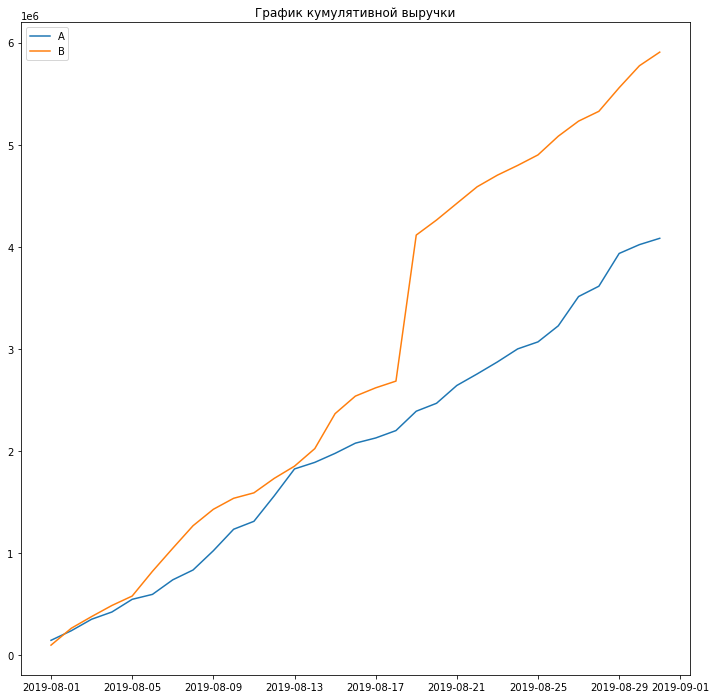

In [9]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,12))
plt.title('График кумулятивной выручки')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 


**У групы А выручка растет равномерно, что как я понимаю, довольно таки неплохо. У групы В выручка до определнного момента растет более менее равномерно, но где-то на 2019-08-19 есть большой скачок вверх, что может говорить о увелечение количества заказов либо же о появление более дорогих заказов.Что интересно, после всплеска у групы В выручка вновь вышла на равномерный рост**

### График кумулятивного среднего чека по группам. 
<a id='3_link'><a>

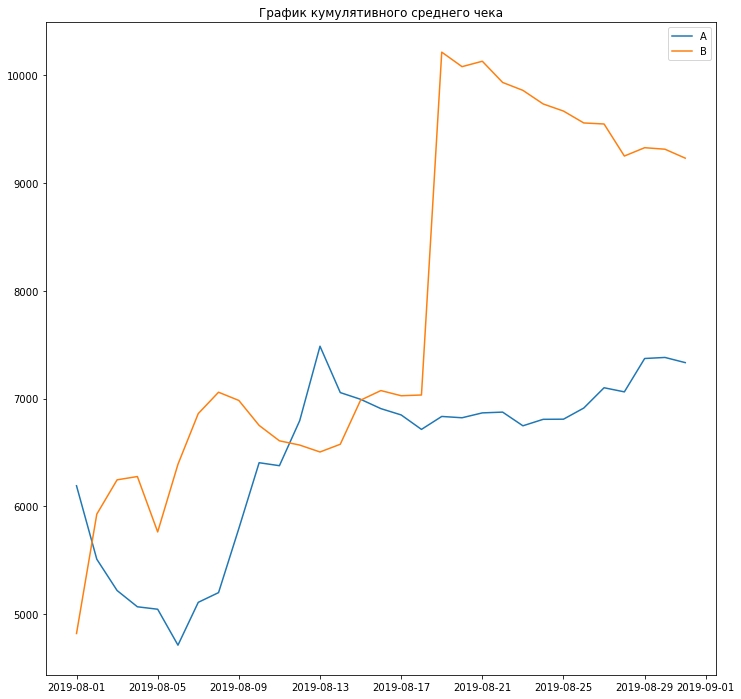

In [10]:
plt.figure(figsize=(12,12))
plt.title('График кумулятивного среднего чека')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

**График среднего чека не равномерный для 2 груп. В определенном моменте он вроде выравнивается к концу, но до этого идут как всплески так и и падения (для А). Для группы В скорее всего попали крупные заказы, которые значительно увеличили средний чек группы**

### График относительного изменения кумулятивного среднего чека группы B к группе A. 
<a id='4_link'><a>

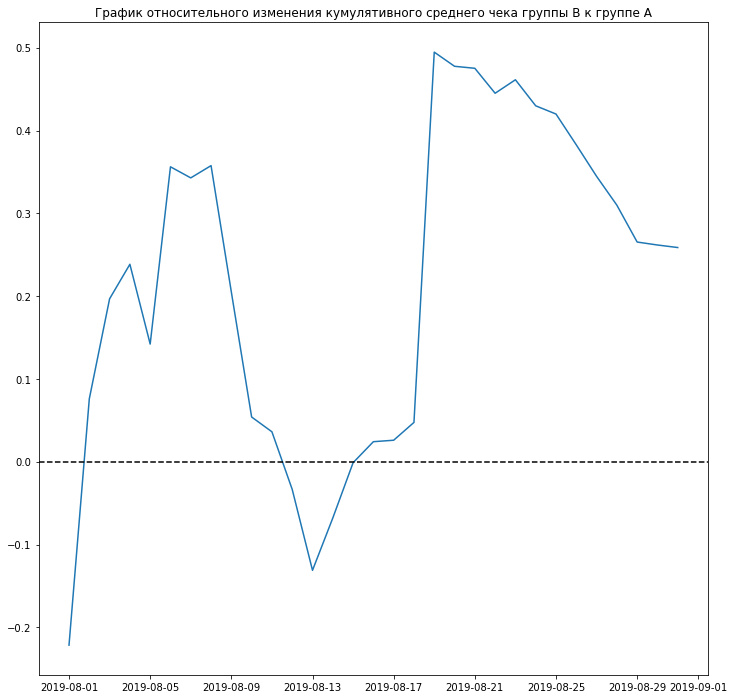

In [11]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,12))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 






**В многих точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!**


### График кумулятивной конверсии по группам. 
<a id='5_link'><a>

(737272.0, 737302.0, 0.027, 0.038)

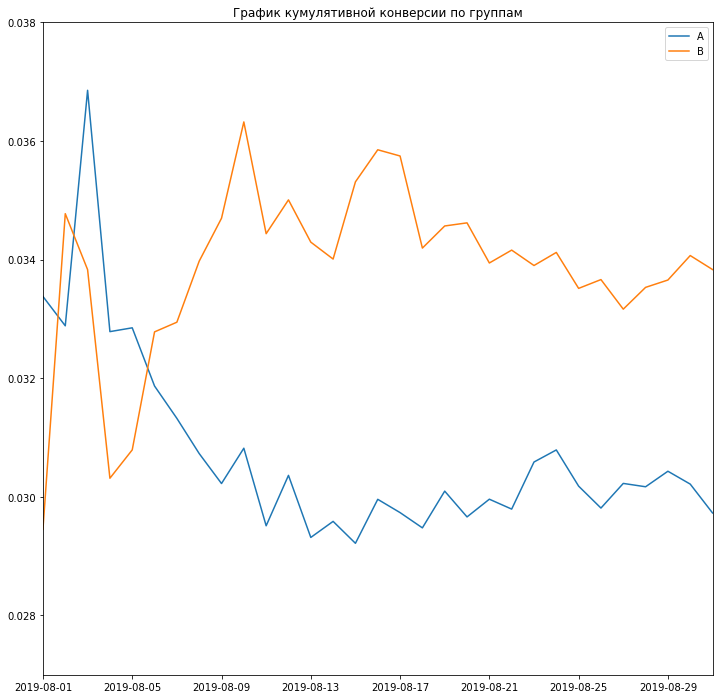

In [12]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,12))
plt.title('График кумулятивной конверсии по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([cumulativeDataA['date'].min(),cumulativeDataA['date'].max(), 0.027, 0.038])

**График после определенного момента (2019-08-07) вроде становится симетричным, но с большой разницей в кумулятивной конверсии в групе В**

### График относительного изменения кумулятивной конверсии группы B к группе A. 
<a id='7_link'><a>

(737272.0, 737302.0, -0.15, 0.25)

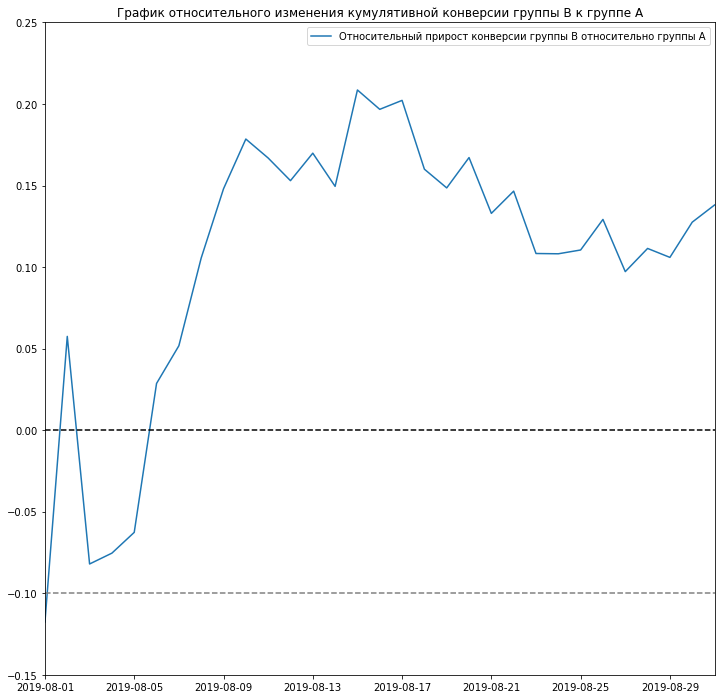

In [13]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 

plt.figure(figsize=(12,12))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([mergedCumulativeConversions['date'].min(),mergedCumulativeConversions['date'].max(), -0.15, 0.25])

**В самом начале теста, наши показатели выше для групы А, но как и по всем другим графикам потом покупатели из группы В значительно вырываются вверх и сильно отличаються от групы А. Так и тут конверсия групы В выше конверсии групы А.**

### Точечный график количества заказов по пользователям. 
<a id='8_link'><a>

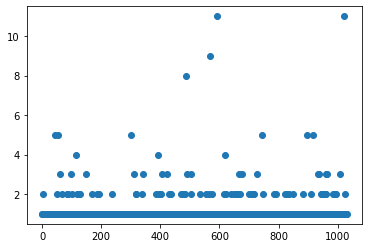

In [14]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])




**Как мы видим довольно много выбросов у нас есть**

###  95-й и 99-й перцентили количества заказов на пользователя. 
<a id='9_link'><a>

In [15]:
display(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

array([1., 2., 4.])

**Всего лишь 5% пользователей сделали больше 2 заказов и 1% процент сделал больше чем 4 заказа**

### Точечный график стоимостей заказов. 
<a id='10_link'><a>

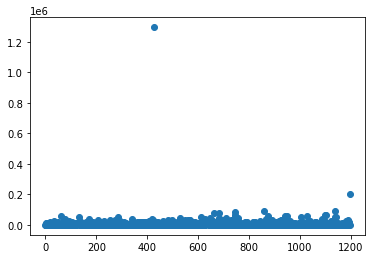

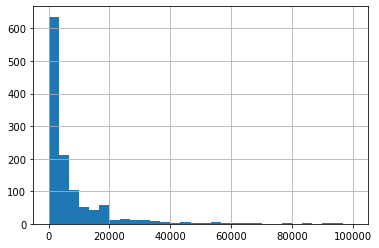

In [16]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values,orders['revenue']) 

plt.show()
display(orders['revenue'].hist(bins=30, range=(0,100000)))


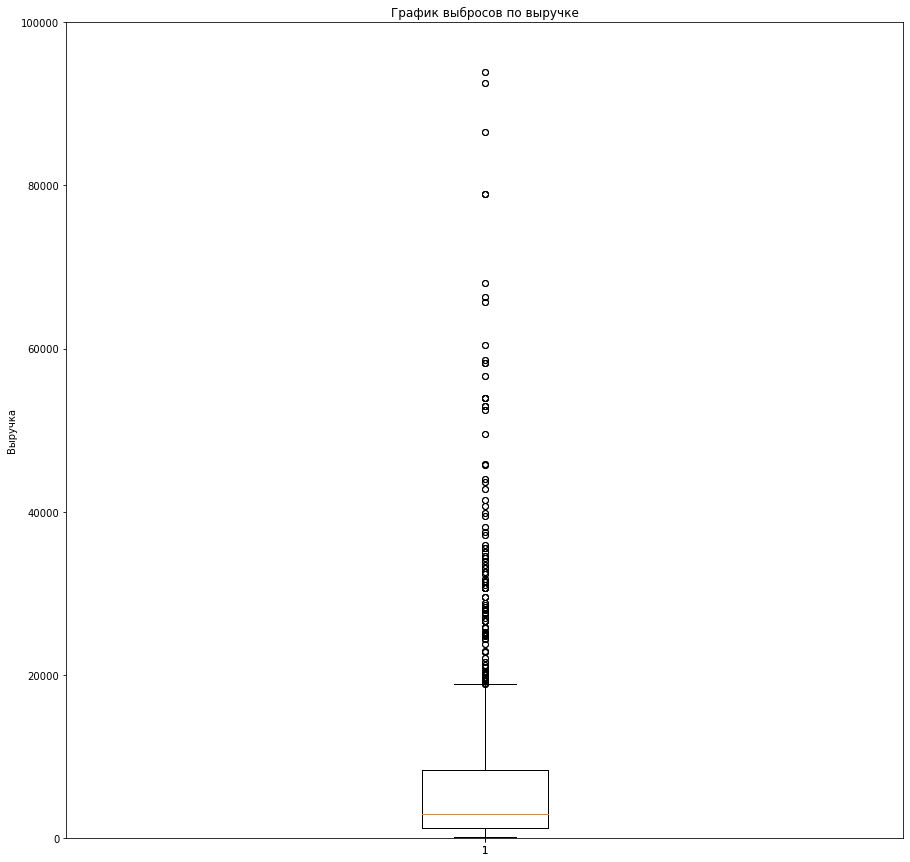

In [17]:
plt.figure(figsize=(15,15))
plt.boxplot(orders['revenue'])
plt.title('График выбросов по выручке')
plt.ylabel('Выручка')
plt.boxplot(orders['revenue'])
plt.ylim((0,100000))
plt.show()

### 95-й и 99-й перцентили стоимости заказов. 
<a id='11_link'><a>

In [18]:
display(np.percentile(orders['revenue'], [90, 95, 99])) 

array([18168. , 28000. , 58233.2])

**Больше 5% сделали заказы на сумму от 28000, и всего 1% процент сделал заказов больше чем на 59к**


###  Статистическая значимость различий в конверсии между группами по «сырым» данным. 
<a id='12_link'><a>

Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни, так как у нас есть много выбросов, и параметрический тест Стьюдента тут не подойдет.  
Построим такие гипотезы:  
 - Нулевая гипотеза: статистический значимых различий в конверсии между группами по "сырым" данным нет.
 - Альтернативаня гипотеза: вывод о различие между конверсиями сделать нельзя.


In [19]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')


ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.00840
0.138


**Исходя из результата теста мана-витни у нас нет статистически значимых различий в конверсии между групами А и В, поэтому мы  не отвергаем нулевую гипотезу. Скорее всего это произошло из-за того что у нас очень много выбросов в сырых данных. Также видим выигрышь групы В на 13,8% над групой А**

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 
<a id='13_link'><a>

Также будем использовать непараметрический тест Уилкоксона-Манна-Уитни.
Построим такие гипотезы:  
 - Нулевая гипотеза: статистический значимых различий в среднем чеке между группами по "сырым" данным нет.
 - Альтернативаня гипотеза: вывод о различие между средним чеком сделать нельзя.

In [20]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


**А вот что очень интересно в среднем чеке заказа P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек групы В значительно выше среднего чека групы А**

### Статистическая значимость различий в конверсии между группами по «очищенным» данным. 
<a id='14_link'><a>

*Для очищенных данных возьмем "фильтры" в 3 заказа, и стоимость заказа 30000*

In [21]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
(57,)


**Исходя из наших фильтраций, у нас есть 57 аномальных пользователей, посмотрим как изменяться результаты, если мы их уберем из теста**

Для правильности сравнения продолжаем использовать непараметрический тест Уилкоксона-Манна-Уитни.
Гипотезы:  
 - Нулевая гипотеза: статистический значимых различий в конверсии между группами по "чистым" данным нет.
 - Альтернативаня гипотеза: вывод о различие между конверсиями сделать нельзя.

In [22]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 


print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.009
0.148


**Результаты по конверсии практически не изменились. Только выросла сила групы В над групой А ещё на пару процентов**

###  Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
<a id='15_link'><a>

Для правильности сравнения продолжаем использовать непараметрический тест Уилкоксона-Манна-Уитни.
Гипотезы:  
- Нулевая гипотеза: статистический значимых различий в среднем чеке между группами по "чистым" данным нет.
- Альтернативаня гипотеза: вывод о различие между средним чеком сделать нельзя. 

In [23]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.479
-0.020


**P-value увеличился,  и разница между сегментами теперь абсолютна другая. После чистки данных мы видим, что теперь средний чек групы В чуть меньше чем у групы А. Без чистки данных наш средний чек для групы В был значительно выше. Хорошо, что мы провели чистку данных, так как аномалии очень сильно влияли на конечный результат, особенно по среднему чеку**

### Выводы 
- Нет статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Одна "сила" конверсии групы В выше чему у групы А на 15,9% по отфильтрованным данным.
- По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть. Также сам средний чек групы В у нас перетерпел значительные изменения после очистки аномальных данных.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.
- График различия среднего чека колеблется: он-то и позволил нам найти аномалии.
 
**Из фактов перечисленных выше, нужно остановить тест, зафиксировать победу групы В над групой А**